<div class="alert alert-danger" role="alert">
<h1>Logistic Regression</h1>
<ul>
<li><ol  start='1'>
<li>Import Libraries</li>

</ol>
</li>
<li><ol start='2' >
<li>Prepare Dataset</li>

</ol>
</li>
<li><ol start='3' >
<li>Create Logistic Regression Model</li>

</ol>
</li>
<li><ol start='4' >
<li>Instantiate Model</li>
 
</ol>
</li>
<li><ol start='5' >
<li>Instantiate Loss</li>
    
</ol>
</li>
<li><ol start='6' >
<li>Instantiate Optimizer</li>

</ol>
</li>
<li><ol start='7' >
<li>Traning the Model</li>
    
</ol>
</li>
<li><ol start='8' >
<li>Prediction</li>
    
</ol>
</li>
   
</ul>
</div>

In [16]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

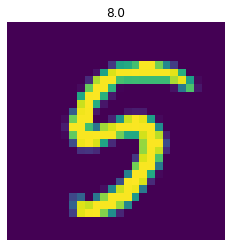

In [18]:
# prepare dataset
# load data
train = pd.read_csv(r"datasets\digit-recognizer\train.csv", dtype=np.float32)

# split datainfo features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size=0.2,
                                                                             random_state=42)

# create feature and targets tensor for train set. 
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# visualize one of the images in data set
plt.imshow(features_numpy[8].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [19]:
# create logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        # however logistic function in pytorch is in loss function 
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate model class
input_dim = 28 * 28 # size of image px*px
output_dim = 10 # labels 0,1,2,...,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# cross entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
# training the model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward porpagation
        outputs = model(train)
        
        # calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # calculate gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        # prediction
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                # forward propagation
                outputs = model(test)
                # get predictions from the max value
                predicted = torch.max(outputs.data, 1)[1]
                # total number of labels
                total += len(labels)
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration 
            loss_list.append(loss.data)
            iteration_list.append(count)
        
        if count % 500 == 0:
            # print loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.866590142250061  Accuracy: 64.88095092773438%
Iteration: 1000  Loss: 1.625024676322937  Accuracy: 75.48809814453125%
Iteration: 1500  Loss: 1.3144197463989258  Accuracy: 78.46428680419922%
Iteration: 2000  Loss: 1.2165818214416504  Accuracy: 79.98809814453125%
Iteration: 2500  Loss: 1.0580761432647705  Accuracy: 81.05952453613281%
Iteration: 3000  Loss: 0.9362236261367798  Accuracy: 82.01190185546875%
Iteration: 3500  Loss: 0.9132123589515686  Accuracy: 82.72618865966797%
Iteration: 4000  Loss: 0.7546958327293396  Accuracy: 83.21428680419922%
Iteration: 4500  Loss: 0.9733425974845886  Accuracy: 83.63095092773438%
Iteration: 5000  Loss: 0.8013371825218201  Accuracy: 83.97618865966797%
Iteration: 5500  Loss: 0.7533406615257263  Accuracy: 84.26190185546875%
Iteration: 6000  Loss: 0.8716821074485779  Accuracy: 84.54762268066406%
Iteration: 6500  Loss: 0.6628409028053284  Accuracy: 84.85713958740234%
Iteration: 7000  Loss: 0.720717191696167  Accuracy: 85.071426391601

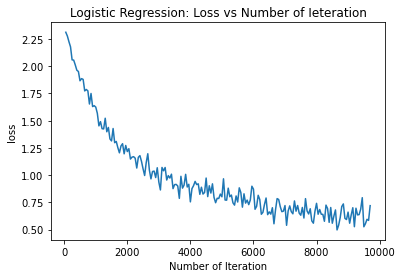

In [21]:
# visualization
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("loss")
plt.title("Logistic Regression: Loss vs Number of Ieteration")
plt.show()